In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
ÌïòÏ≤ú ÏàòÏßà Îç∞Ïù¥ÌÑ∞ÏôÄ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù
Author: ÏàòÏßà Î∂ÑÏÑù Ï†ÑÎ¨∏Í∞Ä
Date: 2025
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# ÌÜµÍ≥Ñ Î∞è Î®∏Ïã†Îü¨Îãù ÎùºÏù¥Î∏åÎü¨Î¶¨
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [2]:
from datetime import datetime



class WaterQualityWeatherAnalyzer:
    """ÏàòÏßà-Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÌÅ¥ÎûòÏä§"""
    
    def __init__(self, file_path):
        """
        Ï¥àÍ∏∞Ìôî
        Args:
            file_path (str): ÏóëÏÖÄ ÌååÏùº Í≤ΩÎ°ú
        """
        self.file_path = file_path
        self.data = None
        self.water_quality_cols = []
        self.weather_cols = []
        self.results = {}
        
    def load_data(self):
        """Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨"""
        print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ï§ë...")
        
        # ÏóëÏÖÄ ÌååÏùº ÏùΩÍ∏∞
        self.data = pd.read_excel(self.file_path, engine='openpyxl', sheet_name=0) # Ï≤´ Î≤àÏß∏ ÏãúÌä∏Îßå ÏùΩÍ∏∞
        
        # Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
        self.data.columns = self.data.columns.str.strip()
        
        # Ï∏°Ï†ïÏãúÍ∞ÑÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
        self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'] = pd.to_datetime(self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'])
        
        # ÏàòÏßà ÏßÄÌëúÏôÄ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î∂ÑÎ•ò
        self.water_quality_cols = [
            'ÏàòÏÜåÏù¥Ïò®ÎÜçÎèÑ', 'Ïö©Ï°¥ÏÇ∞ÏÜå', 'Ï†ÑÍ∏∞Ï†ÑÎèÑÎèÑ', 'Ï¥ùÏú†Í∏∞ÌÉÑÏÜå',
            'Ï¥ùÏßàÏÜå', 'Ï¥ùÏù∏', 'ÌÅ¥Î°úÎ°úÌïÑ-a', 'ÎÇ®Ï°∞Î•ò', 'ÎØ∏ÏÉùÎ¨ºÎèÖÏÑ±_ÏßÄÏàò'
        ]
        
        self.weather_cols = [
            "Í∏∞Ïò®(¬∞C)", "Í∞ïÏàòÎüâ(mm)", "Í∞ïÏàòÎüâ(ÏùºÎàÑÏ†Å)", "ÌíçÏÜç(m/s)", "ÏäµÎèÑ(%)", "Ï¶ùÍ∏∞Ïïï(hPa)", "Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)",
            "ÌòÑÏßÄÍ∏∞Ïïï(hPa)", "ÏùºÏ°∞(hr)", "ÏùºÏ°∞(ÎàÑÏ†Å)", "ÏùºÏÇ¨(MJ/m2)", "ÏùºÏÇ¨(ÎàÑÏ†Å)", "ÏãúÏ†ï(10m)", "ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)"
        ]
        
        # Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò (Îπà Î¨∏ÏûêÏó¥ÏùÄ NaNÏúºÎ°ú)
        for col in self.water_quality_cols + self.weather_cols:
            if col in self.data.columns:
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
        
        print(f"Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å: {len(self.data)}Ìñâ √ó {len(self.data.columns)}Ïó¥")
        print(f"Í∏∞Í∞Ñ: {self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'].min()} ~ {self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'].max()}")

    # def load_data(self):
    #     """Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨"""
    #     print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ï§ë...")
        
    #     # ÏóëÏÖÄ ÌååÏùº ÏùΩÍ∏∞
    #     self.data = pd.read_excel(self.file_path)
        
    #     # Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
    #     self.data.columns = self.data.columns.str.strip()
        
    #     # Ïã§Ï†ú Ïª¨ÎüºÎ™Ö ÌôïÏù∏
    #     print("Ïã§Ï†ú Ïª¨ÎüºÎ™ÖÎì§:")
    #     print(list(self.data.columns))
        
    #     # ÏãúÍ∞Ñ Í¥ÄÎ†® Ïª¨Îüº Ï∞æÍ∏∞
    #     time_columns = [col for col in self.data.columns if 'ÏãúÍ∞Ñ' in col or 'ÏùºÏãú' in col or 'time' in col.lower() or 'date' in col.lower()]
    #     print(f"ÏãúÍ∞Ñ Í¥ÄÎ†® Ïª¨ÎüºÎì§: {time_columns}")
        
    #     if not time_columns:
    #         print("ÏãúÍ∞Ñ Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Ï≤´ Î≤àÏß∏ Ïª¨ÎüºÏùÑ ÏãúÍ∞ÑÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    #         time_col = self.data.columns[0]
    #     else:
    #         time_col = time_columns[0]
        
    #     print(f"ÏÇ¨Ïö©Ìï† ÏãúÍ∞Ñ Ïª¨Îüº: {time_col}")
        
    #     # Ï∏°Ï†ïÏãúÍ∞ÑÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
    #     self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'] = pd.to_datetime(self.data[time_col], errors='coerce')
        
    #     # ÏàòÏßà ÏßÄÌëúÏôÄ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº Î∂ÑÎ•ò (Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå)
    #     potential_water_cols = [
    #         'ÏàòÏÜåÏù¥Ïò®ÎÜçÎèÑ', 'Ïö©Ï°¥ÏÇ∞ÏÜå', 'Ï†ÑÍ∏∞Ï†ÑÎèÑÎèÑ', 'ÏàòÏò®', 'Ï¥ùÏú†Í∏∞ÌÉÑÏÜå',
    #         'Ï¥ùÏßàÏÜå', 'Ï¥ùÏù∏', 'ÌÅ¥Î°úÎ°úÌïÑ-a', 'ÎÇ®Ï°∞Î•ò', 'ÎØ∏ÏÉùÎ¨º ÎèÖÏÑ±ÏßÄÏàò'
    #     ]
        
    #     potential_weather_cols = [
    #         'Í∏∞ÏÉÅ_2.Í∏∞Ïò®(¬∞C)', 'Í∏∞ÏÉÅ_2.Í∞ïÏàòÎüâ(mm)', 'Í∏∞ÏÉÅ_2.ÌíçÏÜç(m/s)',
    #         'Í∏∞ÏÉÅ_2.ÏäµÎèÑ(%)', 'Í∏∞ÏÉÅ_2.Ï¶ùÍ∏∞Ïïï(hPa)', 'Í∏∞ÏÉÅ_2.Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)',
    #         'Í∏∞ÏÉÅ_2.ÌòÑÏßÄÍ∏∞Ïïï(hPa)', 'Í∏∞ÏÉÅ_2.Ìï¥Î©¥Í∏∞Ïïï(hPa)', 'Í∏∞ÏÉÅ_2.ÏùºÏ°∞(hr)',
    #         'Í∏∞ÏÉÅ_2.ÏùºÏÇ¨(MJ/m2)', 'Í∏∞ÏÉÅ_2.ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)'
    #     ]
        
    #     # Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
    #     self.water_quality_cols = [col for col in potential_water_cols if col in self.data.columns]
    #     self.weather_cols = [col for col in potential_weather_cols if col in self.data.columns]
        
    #     print(f"Ï∞æÏùÄ ÏàòÏßà Ïª¨ÎüºÎì§ ({len(self.water_quality_cols)}Í∞ú): {self.water_quality_cols}")
    #     print(f"Ï∞æÏùÄ Í∏∞ÏÉÅ Ïª¨ÎüºÎì§ ({len(self.weather_cols)}Í∞ú): {self.weather_cols}")
        
    #     # Ïà´ÏûêÌòï Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò (Îπà Î¨∏ÏûêÏó¥ÏùÄ NaNÏúºÎ°ú)
    #     for col in self.water_quality_cols + self.weather_cols:
    #         if col in self.data.columns:
    #             self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
        
    #     print(f"Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å: {len(self.data)}Ìñâ √ó {len(self.data.columns)}Ïó¥")
    #     if 'Ï∏°Ï†ïÏãúÍ∞Ñ' in self.data.columns and not self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'].isna().all():
    #         print(f"Í∏∞Í∞Ñ: {self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'].min()} ~ {self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'].max()}")


    def basic_statistics(self):
        """Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥"""
        print("\n=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ===")
        
        # ÏàòÏßà Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ ÌÜµÍ≥Ñ
        water_quality_data = self.data[self.water_quality_cols].dropna()
        weather_data = self.data[self.weather_cols].dropna()
        
        print("\n[ÏàòÏßà ÏßÄÌëú Í∏∞Î≥∏ ÌÜµÍ≥Ñ]")
        print(water_quality_data.describe())
        
        print("\n[Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ ÌÜµÍ≥Ñ]")
        print(weather_data.describe())
        
        # Í≤∞Ï∏°Í∞í ÌôïÏù∏
        print("\n[Í≤∞Ï∏°Í∞í ÌòÑÌô©]")
        missing_info = pd.DataFrame({
            'Í≤∞Ï∏°Í∞í_Í∞úÏàò': self.data.isnull().sum(),
            'Í≤∞Ï∏°Í∞í_ÎπÑÏú®(%)': (self.data.isnull().sum() / len(self.data) * 100).round(2)
        })
        print(missing_info[missing_info['Í≤∞Ï∏°Í∞í_Í∞úÏàò'] > 0])
        
        self.results['basic_stats'] = {
            'water_quality': water_quality_data.describe(),
            'weather': weather_data.describe(),
            'missing_values': missing_info
        }
        
    def correlation_analysis(self):
        """ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù"""
        print("\n=== ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù ===")
        
        # ÏàòÏßà-Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
        analysis_data = self.data[self.water_quality_cols + self.weather_cols].dropna()
        
        # Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
        pearson_corr = analysis_data.corr(method='pearson')
        
        # Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
        spearman_corr = analysis_data.corr(method='spearman')
        
        # ÏàòÏßà-Í∏∞ÏÉÅ Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂îÏ∂ú
        water_weather_pearson = pearson_corr.loc[self.water_quality_cols, self.weather_cols]
        water_weather_spearman = spearman_corr.loc[self.water_quality_cols, self.weather_cols]
        
        print("\n[ÏàòÏßà-Í∏∞ÏÉÅ Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò]")
        print(water_weather_pearson.round(3))
        
        print("\n[ÏàòÏßà-Í∏∞ÏÉÅ Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò]")
        print(water_weather_spearman.round(3))
        
        # Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï∞æÍ∏∞ (|r| > 0.3)
        significant_correlations = []
        for water_col in self.water_quality_cols:
            for weather_col in self.weather_cols:
                if water_col in analysis_data.columns and weather_col in analysis_data.columns:
                    pearson_r = water_weather_pearson.loc[water_col, weather_col]
                    if abs(pearson_r) > 0.3:
                        significant_correlations.append({
                            'ÏàòÏßàÏßÄÌëú': water_col,
                            'Í∏∞ÏÉÅÏöîÏÜå': weather_col,
                            'Pearson_r': round(pearson_r, 3),
                            'Spearman_r': round(water_weather_spearman.loc[water_col, weather_col], 3)
                        })
        
        sig_corr_df = pd.DataFrame(significant_correlations).sort_values('Pearson_r', key=abs, ascending=False)
        print(f"\n[Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ (|r| > 0.3): {len(sig_corr_df)}Í∞ú]")
        print(sig_corr_df)
        
        self.results['correlation'] = {
            'pearson': water_weather_pearson,
            'spearman': water_weather_spearman,
            'significant': sig_corr_df
        }
        
        return water_weather_pearson, water_weather_spearman
    
    def regression_analysis(self):
        """ÌöåÍ∑ÄÎ∂ÑÏÑù"""
        print("\n=== ÌöåÍ∑ÄÎ∂ÑÏÑù ===")
        
        regression_results = {}
        analysis_data = self.data[self.water_quality_cols + self.weather_cols].dropna()
        
        for water_col in self.water_quality_cols:
            if water_col in analysis_data.columns:
                print(f"\n[{water_col} ÌöåÍ∑ÄÎ∂ÑÏÑù]")
                
                y = analysis_data[water_col]
                X = analysis_data[self.weather_cols]
                
                # Îã§Ï§ëÏÑ†ÌòïÌöåÍ∑Ä
                lr = LinearRegression()
                lr.fit(X, y)
                y_pred = lr.predict(X)
                
                # R-squared Í≥ÑÏÇ∞
                r2 = r2_score(y, y_pred)
                rmse = np.sqrt(mean_squared_error(y, y_pred))
                
                # ÌöåÍ∑ÄÍ≥ÑÏàò
                coef_df = pd.DataFrame({
                    'Î≥ÄÏàò': X.columns,
                    'ÌöåÍ∑ÄÍ≥ÑÏàò': lr.coef_,
                    'Ï†àÎåìÍ∞í': np.abs(lr.coef_)
                }).sort_values('Ï†àÎåìÍ∞í', ascending=False)
                
                print(f"R-squared: {r2:.3f}")
                print(f"RMSE: {rmse:.3f}")
                print("Ï£ºÏöî ÏòÅÌñ• ÏöîÏù∏:")
                print(coef_df.head())
                
                regression_results[water_col] = {
                    'r2': r2,
                    'rmse': rmse,
                    'coefficients': coef_df,
                    'intercept': lr.intercept_
                }
        
        self.results['regression'] = regression_results
        
    def random_forest_analysis(self):
        """ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù"""
        print("\n=== ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌäπÏÑ± Ï§ëÏöîÎèÑ Î∂ÑÏÑù ===")
        
        rf_results = {}
        analysis_data = self.data[self.water_quality_cols + self.weather_cols].dropna()
        
        for water_col in self.water_quality_cols:
            if water_col in analysis_data.columns:
                y = analysis_data[water_col]
                X = analysis_data[self.weather_cols]
                
                # ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏
                rf = RandomForestRegressor(n_estimators=100, random_state=42)
                rf.fit(X, y)
                
                # ÌäπÏÑ± Ï§ëÏöîÎèÑ
                importance_df = pd.DataFrame({
                    'Í∏∞ÏÉÅÏöîÏÜå': X.columns,
                    'Ï§ëÏöîÎèÑ': rf.feature_importances_
                }).sort_values('Ï§ëÏöîÎèÑ', ascending=False)
                
                print(f"\n[{water_col} - Í∏∞ÏÉÅÏöîÏÜå Ï§ëÏöîÎèÑ]")
                print(importance_df)
                
                rf_results[water_col] = importance_df
        
        self.results['random_forest'] = rf_results
        
    def time_series_analysis(self):
        """ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù"""
        print("\n=== ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù ===")
        
        # ÎÇ†ÏßúÎ≥Ñ ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
        daily_data = self.data.groupby(self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'].dt.date)[
            self.water_quality_cols + self.weather_cols
        ].mean()
        
        ts_results = {}
        
        for col in self.water_quality_cols:
            if col in daily_data.columns and not daily_data[col].isna().all():
                ts_data = daily_data[col].dropna()
                
                if len(ts_data) > 10:  # Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ ÎïåÎßå
                    # Ï†ïÏÉÅÏÑ± Í≤ÄÏ†ï (ADF ÌÖåÏä§Ìä∏)
                    adf_result = adfuller(ts_data)
                    
                    print(f"\n[{col} ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù]")
                    print(f"ADF ÌÜµÍ≥ÑÎüâ: {adf_result[0]:.3f}")
                    print(f"p-value: {adf_result[1]:.3f}")
                    print(f"Ï†ïÏÉÅÏÑ±: {'Ï†ïÏÉÅ' if adf_result[1] < 0.05 else 'ÎπÑÏ†ïÏÉÅ'}")
                    
                    ts_results[col] = {
                        'adf_statistic': adf_result[0],
                        'p_value': adf_result[1],
                        'is_stationary': adf_result[1] < 0.05
                    }
        
        self.results['time_series'] = ts_results
        
    def pca_analysis(self):
        """Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù"""
        print("\n=== Ï£ºÏÑ±Î∂Ñ Î∂ÑÏÑù ===")
        
        analysis_data = self.data[self.water_quality_cols + self.weather_cols].dropna()
        
        # Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(analysis_data)
        
        # PCA ÏàòÌñâ
        pca = PCA()
        pca_data = pca.fit_transform(scaled_data)
        
        # ÏÑ§Î™ÖÎ∂ÑÏÇ∞ÎπÑ
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        
        print(f"Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™ÖÎ∂ÑÏÇ∞ÎπÑ: {explained_variance_ratio[:5].round(3)}")
        print(f"ÎàÑÏ†Å ÏÑ§Î™ÖÎ∂ÑÏÇ∞ÎπÑ: {cumulative_variance[:5].round(3)}")
        
        # Ï£ºÏÑ±Î∂Ñ Î°úÎî©
        feature_names = self.water_quality_cols + self.weather_cols
        loadings = pd.DataFrame(
            pca.components_[:3].T,
            columns=['PC1', 'PC2', 'PC3'],
            index=feature_names
        )
        
        print("\nÏ£ºÏöî Ï£ºÏÑ±Î∂Ñ Î°úÎî©:")
        print(loadings.round(3))
        
        self.results['pca'] = {
            'explained_variance_ratio': explained_variance_ratio,
            'loadings': loadings,
            'components': pca_data
        }
        
    def clustering_analysis(self):
        """Íµ∞Ïßë Î∂ÑÏÑù"""
        print("\n=== Íµ∞Ïßë Î∂ÑÏÑù ===")
        
        analysis_data = self.data[self.water_quality_cols + self.weather_cols].dropna()
        
        # Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(analysis_data)
        
        # K-means Íµ∞ÏßëÌôî (k=3)
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(scaled_data)
        
        # Íµ∞ÏßëÎ≥Ñ ÌäπÏÑ± Î∂ÑÏÑù
        cluster_summary = analysis_data.copy()
        cluster_summary['Íµ∞Ïßë'] = clusters
        
        cluster_stats = cluster_summary.groupby('Íµ∞Ïßë').mean()
        
        print("Íµ∞ÏßëÎ≥Ñ ÌèâÍ∑†Í∞í:")
        print(cluster_stats.round(3))
        
        print(f"\nÍµ∞ÏßëÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò: {pd.Series(clusters).value_counts().sort_index()}")
        
        self.results['clustering'] = {
            'cluster_labels': clusters,
            'cluster_stats': cluster_stats,
            'cluster_centers': kmeans.cluster_centers_
        }
        
    def create_visualizations(self):
        """ÏãúÍ∞ÅÌôî ÏÉùÏÑ±"""
        print("\n=== ÏãúÍ∞ÅÌôî ÏÉùÏÑ± ===")
        
        # 1. ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ
        plt.figure(figsize=(15, 10))
        correlation_matrix = self.results['correlation']['pearson']
        
        plt.subplot(2, 2, 1)
        sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                   fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
        plt.title('ÏàòÏßà-Í∏∞ÏÉÅ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        
        # 2. ÏãúÍ≥ÑÏó¥ ÌîåÎ°Ø (Ï£ºÏöî ÏàòÏßà ÏßÄÌëú)
        plt.subplot(2, 2, 2)
        for col in ['Ïö©Ï°¥ÏÇ∞ÏÜå', 'ÏàòÏò®', 'Ï¥ùÏßàÏÜå'][:3]:
            if col in self.data.columns:
                plt.plot(self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'], self.data[col], label=col, alpha=0.7)
        plt.xlabel('ÏãúÍ∞Ñ')
        plt.ylabel('Í∞í')
        plt.title('Ï£ºÏöî ÏàòÏßà ÏßÄÌëú ÏãúÍ≥ÑÏó¥', fontsize=14, fontweight='bold')
        plt.legend()
        plt.xticks(rotation=45)
        
        # 3. ÌäπÏÑ± Ï§ëÏöîÎèÑ (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏)
        plt.subplot(2, 2, 3)
        if 'random_forest' in self.results and 'Ïö©Ï°¥ÏÇ∞ÏÜå' in self.results['random_forest']:
            rf_data = self.results['random_forest']['Ïö©Ï°¥ÏÇ∞ÏÜå'].head(8)
            plt.barh(range(len(rf_data)), rf_data['Ï§ëÏöîÎèÑ'])
            plt.yticks(range(len(rf_data)), rf_data['Í∏∞ÏÉÅÏöîÏÜå'])
            plt.xlabel('Ï§ëÏöîÎèÑ')
            plt.title('Ïö©Ï°¥ÏÇ∞ÏÜåÏóê ÎåÄÌïú Í∏∞ÏÉÅÏöîÏÜå Ï§ëÏöîÎèÑ', fontsize=14, fontweight='bold')
        
        # 4. PCA Ïä§ÏΩîÏñ¥ ÌîåÎ°Ø
        plt.subplot(2, 2, 4)
        if 'pca' in self.results:
            pca_components = self.results['pca']['components']
            plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.6)
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.title('PCA Ïä§ÏΩîÏñ¥ ÌîåÎ°Ø', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Íµ∞Ïßë Î∂ÑÏÑù ÏãúÍ∞ÅÌôî
        if 'clustering' in self.results:
            plt.figure(figsize=(12, 8))
            
            analysis_data = self.data[self.water_quality_cols + self.weather_cols].dropna()
            clusters = self.results['clustering']['cluster_labels']
            
            # PCAÎ°ú 2Ï∞®Ïõê Ï∂ïÏÜåÌïòÏó¨ Íµ∞Ïßë ÏãúÍ∞ÅÌôî
            pca_2d = PCA(n_components=2)
            pca_data_2d = pca_2d.fit_transform(StandardScaler().fit_transform(analysis_data))
            
            scatter = plt.scatter(pca_data_2d[:, 0], pca_data_2d[:, 1], 
                                c=clusters, cmap='viridis', alpha=0.6)
            plt.colorbar(scatter)
            plt.xlabel('PC1')
            plt.ylabel('PC2')
            plt.title('Îç∞Ïù¥ÌÑ∞ Íµ∞Ïßë Î∂ÑÏÑù Í≤∞Í≥º', fontsize=14, fontweight='bold')
            plt.show()
        
    def generate_report(self):
        """Î∂ÑÏÑù Í≤∞Í≥º Ï¢ÖÌï© Î≥¥Í≥†ÏÑú"""
        print("\n" + "="*60)
        print("           ÌïòÏ≤ú ÏàòÏßà-Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù Î≥¥Í≥†ÏÑú")
        print("="*60)
        
        # Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠
        print("\nüìä Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:")
        
        if 'correlation' in self.results:
            sig_corr = self.results['correlation']['significant']
            if len(sig_corr) > 0:
                print(f"‚Ä¢ Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ {len(sig_corr)}Í∞ú Î∞úÍ≤¨")
                print("‚Ä¢ Í∞ÄÏû• Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:")
                top_corr = sig_corr.iloc[0]
                print(f"  - {top_corr['ÏàòÏßàÏßÄÌëú']} ‚Üî {top_corr['Í∏∞ÏÉÅÏöîÏÜå']}: r={top_corr['Pearson_r']}")
                
        if 'random_forest' in self.results:
            print("‚Ä¢ Ï£ºÏöî ÏòÅÌñ• ÏöîÏù∏ (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Í∏∞Ï§Ä):")
            for water_param, importance_df in list(self.results['random_forest'].items())[:3]:
                top_factor = importance_df.iloc[0]
                print(f"  - {water_param}: {top_factor['Í∏∞ÏÉÅÏöîÏÜå']} (Ï§ëÏöîÎèÑ: {top_factor['Ï§ëÏöîÎèÑ']:.3f})")
        
        # Í∂åÏû•ÏÇ¨Ìï≠
        print("\nüí° Î∂ÑÏÑù Í≤∞Í≥º Í∏∞Î∞ò Í∂åÏû•ÏÇ¨Ìï≠:")
        print("‚Ä¢ Ï£ºÏöî Í∏∞ÏÉÅ ÏöîÏù∏Îì§Ïùò ÏßÄÏÜçÏ†ÅÏù∏ Î™®ÎãàÌÑ∞ÎßÅ ÌïÑÏöî")
        print("‚Ä¢ Í≥ÑÏ†àÎ≥Ñ/ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏÑ∏Î∂ÑÌôîÎêú Î∂ÑÏÑù Í∂åÏû•")
        print("‚Ä¢ Í∑πÍ∞í Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î≥ÑÎèÑ Î∂ÑÏÑù ÌïÑÏöî")
        print("‚Ä¢ Îã§Î≥ÄÎüâ ÏòàÏ∏° Î™®Îç∏ Í∞úÎ∞ú Í∞ÄÎä•ÏÑ± Í≤ÄÌÜ†")
        
        print("\n" + "="*60)
        
    def run_full_analysis(self):
        """Ï†ÑÏ≤¥ Î∂ÑÏÑù Ïã§Ìñâ"""
        self.load_data()
        self.basic_statistics()
        self.correlation_analysis()
        self.regression_analysis()
        self.random_forest_analysis()
        self.time_series_analysis()
        self.pca_analysis()
        self.clustering_analysis()
        self.create_visualizations()
        self.generate_report()
        
        return self.results

# Ï∂îÍ∞Ä Î∂ÑÏÑù Ìï®ÏàòÎì§
    def detailed_correlation_analysis(self, water_param, weather_param):
        """ÌäπÏ†ï ÏàòÏßà-Í∏∞ÏÉÅ ÏöîÏÜå Í∞Ñ ÏÉÅÏÑ∏ ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù"""
        if water_param not in self.data.columns or weather_param not in self.data.columns:
            print("ÏßÄÏ†ïÎêú Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
            return
        
        # Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
        x = self.data[weather_param].dropna()
        y = self.data[water_param].dropna()
        
        # Í≥µÌÜµ Ïù∏Îç±Ïä§
        common_idx = x.index.intersection(y.index)
        x_common = x[common_idx]
        y_common = y[common_idx]
        
        # ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∞è Ïú†ÏùòÏÑ± Í≤ÄÏ†ï
        pearson_r, pearson_p = pearsonr(x_common, y_common)
        spearman_r, spearman_p = spearmanr(x_common, y_common)
        
        print(f"\n=== {water_param} vs {weather_param} ÏÉÅÏÑ∏ Î∂ÑÏÑù ===")
        print(f"Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: {pearson_r:.4f} (p-value: {pearson_p:.4f})")
        print(f"Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò: {spearman_r:.4f} (p-value: {spearman_p:.4f})")
        
        # ÏãúÍ∞ÅÌôî
        plt.figure(figsize=(10, 6))
        
        plt.subplot(1, 2, 1)
        plt.scatter(x_common, y_common, alpha=0.6)
        z = np.polyfit(x_common, y_common, 1)
        p = np.poly1d(z)
        plt.plot(x_common, p(x_common), "r--", alpha=0.8)
        plt.xlabel(weather_param)
        plt.ylabel(water_param)
        plt.title(f'ÏÇ∞Ï†êÎèÑ (r={pearson_r:.3f})')
        
        plt.subplot(1, 2, 2)
        residuals = y_common - p(x_common)
        plt.scatter(x_common, residuals, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel(weather_param)
        plt.ylabel('ÏûîÏ∞®')
        plt.title('ÏûîÏ∞® ÌîåÎ°Ø')
        
        plt.tight_layout()
        plt.show()
        
        return {
            'pearson_r': pearson_r, 'pearson_p': pearson_p,
            'spearman_r': spearman_r, 'spearman_p': spearman_p
        }
    
    def seasonal_analysis(self):
        """Í≥ÑÏ†àÎ≥Ñ Î∂ÑÏÑù"""
        print("\n=== Í≥ÑÏ†àÎ≥Ñ Î∂ÑÏÑù ===")
        
        # Í≥ÑÏ†à Ï†ïÏùò
        self.data['Ïõî'] = self.data['Ï∏°Ï†ïÏãúÍ∞Ñ'].dt.month
        self.data['Í≥ÑÏ†à'] = self.data['Ïõî'].map({
            12: 'Í≤®Ïö∏', 1: 'Í≤®Ïö∏', 2: 'Í≤®Ïö∏',
            3: 'Î¥Ñ', 4: 'Î¥Ñ', 5: 'Î¥Ñ',
            6: 'Ïó¨Î¶Ñ', 7: 'Ïó¨Î¶Ñ', 8: 'Ïó¨Î¶Ñ',
            9: 'Í∞ÄÏùÑ', 10: 'Í∞ÄÏùÑ', 11: 'Í∞ÄÏùÑ'
        })
        
        # Í≥ÑÏ†àÎ≥Ñ ÌèâÍ∑†Í∞í
        seasonal_stats = self.data.groupby('Í≥ÑÏ†à')[
            self.water_quality_cols + self.weather_cols
        ].mean()
        
        print("Í≥ÑÏ†àÎ≥Ñ ÏàòÏßà ÏßÄÌëú ÌèâÍ∑†:")
        print(seasonal_stats[self.water_quality_cols].round(3))
        
        print("\nÍ≥ÑÏ†àÎ≥Ñ Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑†:")
        print(seasonal_stats[self.weather_cols].round(3))
        
        return seasonal_stats
    
    def extreme_event_analysis(self):
        """Í∑πÍ∞í Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù"""
        print("\n=== Í∑πÍ∞í Ïù¥Î≤§Ìä∏ Î∂ÑÏÑù ===")
        
        extreme_events = {}
        
        for col in self.water_quality_cols + self.weather_cols:
            if col in self.data.columns:
                Q1 = self.data[col].quantile(0.25)
                Q3 = self.data[col].quantile(0.75)
                IQR = Q3 - Q1
                
                # Ïù¥ÏÉÅÏπò Í∏∞Ï§Ä
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers = self.data[
                    (self.data[col] < lower_bound) | (self.data[col] > upper_bound)
                ]
                
                if len(outliers) > 0:
                    extreme_events[col] = {
                        'count': len(outliers),
                        'percentage': len(outliers) / len(self.data) * 100,
                        'dates': outliers['Ï∏°Ï†ïÏãúÍ∞Ñ'].tolist()
                    }
                    
                    print(f"{col}: {len(outliers)}Í∞ú Í∑πÍ∞í ({len(outliers)/len(self.data)*100:.1f}%)")
        
        return extreme_events
    
    def export_results(self, filename='water_quality_analysis_results.xlsx'):
        """Í≤∞Í≥ºÎ•º ÏóëÏÖÄ ÌååÏùºÎ°ú ÎÇ¥Î≥¥ÎÇ¥Í∏∞"""
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"water_quality_analysis_results_{timestamp}.xlsx"
        print(f"\nÍ≤∞Í≥ºÎ•º {filename}Î°ú ÎÇ¥Î≥¥ÎÇ¥Îäî Ï§ë...")
        
        with pd.ExcelWriter(filename, engine='openpyxl') as writer:
            # ÏÉÅÍ¥ÄÍ≥ÑÏàò Îß§Ìä∏Î¶≠Ïä§
            if 'correlation' in self.results:
                self.results['correlation']['pearson'].to_excel(
                    writer, sheet_name='Pearson_ÏÉÅÍ¥ÄÍ≥ÑÏàò'
                )
                self.results['correlation']['spearman'].to_excel(
                    writer, sheet_name='Spearman_ÏÉÅÍ¥ÄÍ≥ÑÏàò'
                )
                self.results['correlation']['significant'].to_excel(
                    writer, sheet_name='Ïú†ÏùòÌïú_ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ', index=False
                )
            
            # ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º
            if 'regression' in self.results:
                regression_summary = []
                for param, result in self.results['regression'].items():
                    regression_summary.append({
                        'ÏàòÏßàÏßÄÌëú': param,
                        'R-squared': result['r2'],
                        'RMSE': result['rmse']
                    })
                pd.DataFrame(regression_summary).to_excel(
                    writer, sheet_name='ÌöåÍ∑ÄÎ∂ÑÏÑù_ÏöîÏïΩ', index=False
                )
            
            # ÌäπÏÑ± Ï§ëÏöîÎèÑ
            if 'random_forest' in self.results:
                for param, importance_df in self.results['random_forest'].items():
                    sheet_name = f'RFÏ§ëÏöîÎèÑ_{param}'[:31]  # ÏóëÏÖÄ ÏãúÌä∏Î™Ö Í∏∏Ïù¥ Ï†úÌïú
                    importance_df.to_excel(writer, sheet_name=sheet_name, index=False)
        
        print(f"Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: {filename}")


Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ï§ë...
Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å: 13128Ìñâ √ó 30Ïó¥
Í∏∞Í∞Ñ: 2024-01-01 00:00:00 ~ 2025-06-30 23:00:00

=== Í∏∞Î≥∏ ÌÜµÍ≥Ñ Ï†ïÎ≥¥ ===

[ÏàòÏßà ÏßÄÌëú Í∏∞Î≥∏ ÌÜµÍ≥Ñ]
            ÏàòÏÜåÏù¥Ïò®ÎÜçÎèÑ         Ïö©Ï°¥ÏÇ∞ÏÜå        Ï†ÑÍ∏∞Ï†ÑÎèÑÎèÑ        Ï¥ùÏú†Í∏∞ÌÉÑÏÜå          Ï¥ùÏßàÏÜå  \
count  9678.000000  9678.000000  9678.000000  9678.000000  9678.000000   
mean      6.800465     3.910116   311.477475     3.475418     5.206764   
std       0.199625     3.458007    91.661737     1.055412     1.967792   
min       6.100000     0.100000     6.000000     0.000000     1.225000   
25%       6.700000     1.000000   250.000000     2.700000     3.645000   
50%       6.800000     2.700000   299.000000     3.200000     4.755000   
75%       6.900000     6.200000   374.000000     4.200000     6.605500   
max       8.900000    15.900000   620.000000     7.500000    12.140000   

                Ï¥ùÏù∏       ÌÅ¥Î°úÎ°úÌïÑ-a          ÎÇ®Ï°∞Î•ò     ÎØ∏ÏÉùÎ¨ºÎèÖÏÑ±_ÏßÄÏàò  
count  9678.00000

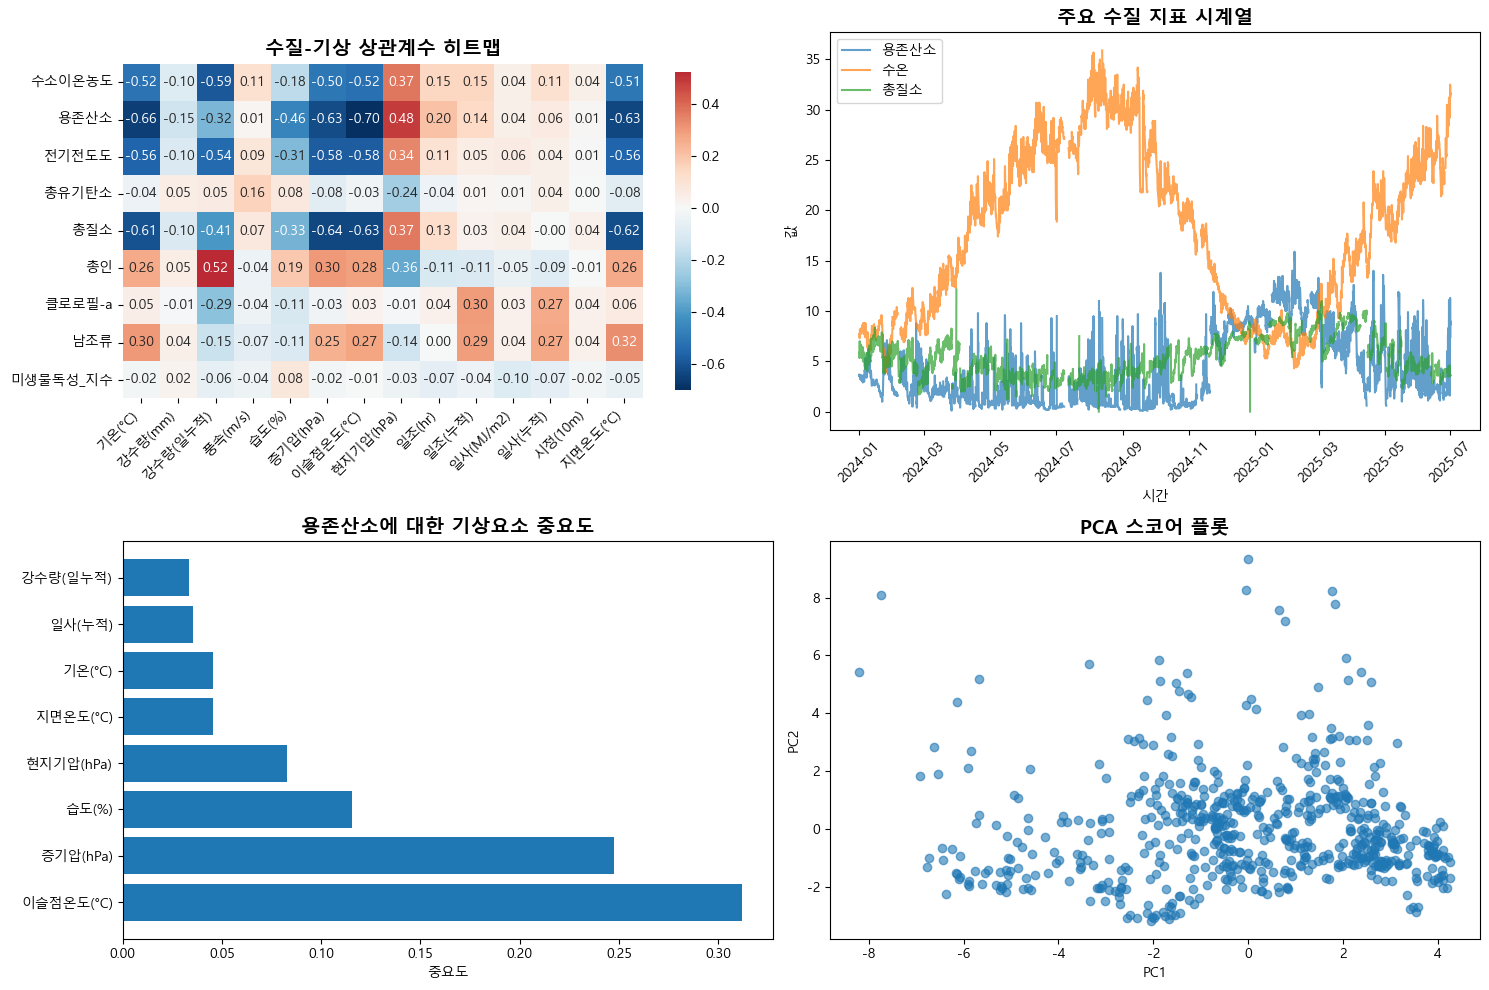

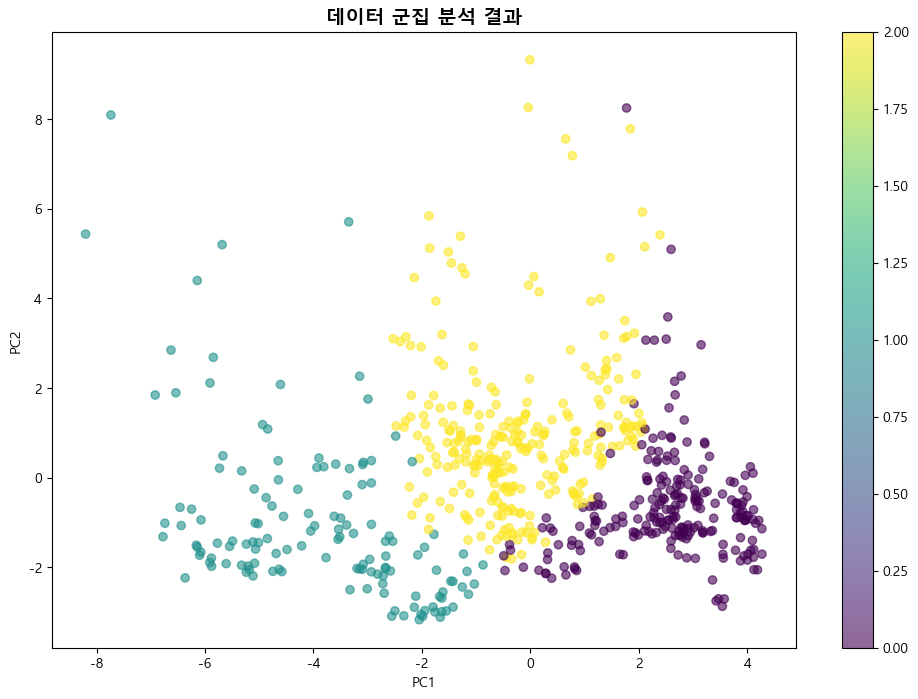


           ÌïòÏ≤ú ÏàòÏßà-Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞ ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

üìä Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:
‚Ä¢ Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ 31Í∞ú Î∞úÍ≤¨
‚Ä¢ Í∞ÄÏû• Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ:
  - Ïö©Ï°¥ÏÇ∞ÏÜå ‚Üî Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C): r=-0.699
‚Ä¢ Ï£ºÏöî ÏòÅÌñ• ÏöîÏù∏ (ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Í∏∞Ï§Ä):
  - ÏàòÏÜåÏù¥Ïò®ÎÜçÎèÑ: Í∞ïÏàòÎüâ(ÏùºÎàÑÏ†Å) (Ï§ëÏöîÎèÑ: 0.337)
  - Ïö©Ï°¥ÏÇ∞ÏÜå: Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C) (Ï§ëÏöîÎèÑ: 0.312)
  - Ï†ÑÍ∏∞Ï†ÑÎèÑÎèÑ: Í∞ïÏàòÎüâ(ÏùºÎàÑÏ†Å) (Ï§ëÏöîÎèÑ: 0.170)

üí° Î∂ÑÏÑù Í≤∞Í≥º Í∏∞Î∞ò Í∂åÏû•ÏÇ¨Ìï≠:
‚Ä¢ Ï£ºÏöî Í∏∞ÏÉÅ ÏöîÏù∏Îì§Ïùò ÏßÄÏÜçÏ†ÅÏù∏ Î™®ÎãàÌÑ∞ÎßÅ ÌïÑÏöî
‚Ä¢ Í≥ÑÏ†àÎ≥Ñ/ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏÑ∏Î∂ÑÌôîÎêú Î∂ÑÏÑù Í∂åÏû•
‚Ä¢ Í∑πÍ∞í Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î≥ÑÎèÑ Î∂ÑÏÑù ÌïÑÏöî
‚Ä¢ Îã§Î≥ÄÎüâ ÏòàÏ∏° Î™®Îç∏ Í∞úÎ∞ú Í∞ÄÎä•ÏÑ± Í≤ÄÌÜ†


=== Ï∂îÍ∞Ä ÏÑ∏Î∂Ä Î∂ÑÏÑù ===
ÏßÄÏ†ïÎêú Ïª¨ÎüºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.

=== Í≥ÑÏ†àÎ≥Ñ Î∂ÑÏÑù ===
Í≥ÑÏ†àÎ≥Ñ ÏàòÏßà ÏßÄÌëú ÌèâÍ∑†:
    ÏàòÏÜåÏù¥Ïò®ÎÜçÎèÑ   Ïö©Ï°¥ÏÇ∞ÏÜå    Ï†ÑÍ∏∞Ï†ÑÎèÑÎèÑ  Ï¥ùÏú†Í∏∞ÌÉÑÏÜå    Ï¥ùÏßàÏÜå     Ï¥ùÏù∏  ÌÅ¥Î°úÎ°úÌïÑ-a     ÎÇ®Ï°∞Î•ò  ÎØ∏ÏÉùÎ¨ºÎèÖÏÑ±_

In [3]:

# ÏÇ¨Ïö© ÏòàÏ†ú
if __name__ == "__main__":
    # Í∏∞Î≥∏ Î∂ÑÏÑù Ïã§Ìñâ
    analyzer = WaterQualityWeatherAnalyzer(r'C.ÏàòÏßàÏ∏°Ï†ïÏ†ïÎ≥¥\Ïö©Î¥âÏ∏°Ï†ïÏÜå_2401-2506Ïõî_re.xlsx')
    results = analyzer.run_full_analysis()
    
    # Ï∂îÍ∞Ä Î∂ÑÏÑù (ÏòàÏãú)
    print("\n=== Ï∂îÍ∞Ä ÏÑ∏Î∂Ä Î∂ÑÏÑù ===")
    
    # ÌäπÏ†ï ÏöîÏÜå Í∞Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù
    analyzer.detailed_correlation_analysis('Ïö©Ï°¥ÏÇ∞ÏÜå', 'Í∏∞ÏÉÅ_2.Í∏∞Ïò®(¬∞C)')
    
    # Í≥ÑÏ†àÎ≥Ñ Î∂ÑÏÑù
    seasonal_data = analyzer.seasonal_analysis()
    
    # Í∑πÍ∞í Î∂ÑÏÑù
    extreme_data = analyzer.extreme_event_analysis()
    
    # Í≤∞Í≥º ÎÇ¥Î≥¥ÎÇ¥Í∏∞
    analyzer.export_results('ÏàòÏßàÍ∏∞ÏÉÅÎ∂ÑÏÑùÍ≤∞Í≥º.xlsx')
    
    print("\n" + "="*50)
    print("üéØ Î∂ÑÏÑù ÏôÑÎ£å!")
    print("‚Ä¢ Ï£º Î∂ÑÏÑù Í≤∞Í≥º: results Î≥ÄÏàò")
    print("‚Ä¢ Í≥ÑÏ†àÎ≥Ñ Îç∞Ïù¥ÌÑ∞: seasonal_data Î≥ÄÏàò") 
    print("‚Ä¢ Í∑πÍ∞í Îç∞Ïù¥ÌÑ∞: extreme_data Î≥ÄÏàò")
    print("‚Ä¢ ÏóëÏÖÄ ÌååÏùº: 'ÏàòÏßàÍ∏∞ÏÉÅÎ∂ÑÏÑùÍ≤∞Í≥º.xlsx'")
    print("="*50)